# Flower Recognition System

#### Import the required libraries 

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import zipfile
import warnings
warnings.filterwarnings('ignore')

#### Download the dataset

In [2]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 96% 215M/225M [00:01<00:00, 174MB/s]
100% 225M/225M [00:01<00:00, 180MB/s]


#### Unzip the dataset 

In [3]:
zip_ref = zipfile.ZipFile('/content/flowers-recognition.zip')
zip_ref.extractall('/content')
zip_ref.close()

#### Preprocess the data

In [4]:
dataset = '/content/flowers'

img_size = 224
batch = 64

In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

train_datagen = train_datagen.flow_from_directory(dataset, target_size=(img_size, img_size), subset='training', batch_size=batch)

test_datagen = test_datagen.flow_from_directory(dataset, target_size=(img_size, img_size), subset='validation', batch_size=batch)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


#### Model architecture

In [6]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))

#### Model compilation and summary

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,541,253 (24.95 MB)

 Trainable params: 6,541,253 (24.95 MB)

 Non-trainable params: 0 (0.00 B)

#### Model training

In [8]:
history = model.fit(train_datagen, epochs=30, validation_data=test_datagen)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 68s 909ms/step - accuracy: 0.3082 - loss: 1.5369 - val_accuracy: 0.5198 - val_loss: 1.1957
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 62s 758ms/step - accuracy: 0.5041 - loss: 1.1579 - val_accuracy: 0.5826 - val_loss: 1.0305
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 780ms/step - accuracy: 0.5681 - loss: 1.0904 - val_accuracy: 0.6174 - val_loss: 1.0035
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 85s 839ms/step - accuracy: 0.6487 - loss: 0.9113 - val_accuracy: 0.6384 - val_loss: 0.9080
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 57s 891ms/step - accuracy: 0.6578 - loss: 0.8935 - val_accuracy: 0.6558 - val_loss: 0.8901
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 73s 784ms/step - accuracy: 0.6759 - loss: 0.8436 - val_accuracy: 0.6186 - val_loss: 0.9716
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 80s 736ms/step - accuracy: 0.6179 - loss: 0.9769 - val_accuracy: 0.6640 - val_loss: 0.8945
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 776ms/step - accuracy: 0.6867 - loss: 0.8207 - val_accu

#### Save the model

In [9]:
model.save("model.keras")

#### Model evaluation

In [11]:
test_datagen.reset()
predictions = model.predict(test_datagen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_datagen.classes
class_labels = list(test_datagen.class_indices.keys())
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'The accuracy of the model is: {accuracy:.4f}')
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
The accuracy of the model is: 0.1930
Classification Report:
              precision    recall  f1-score   support

       daisy       0.14      0.11      0.12       152
   dandelion       0.24      0.21      0.22       210
        rose       0.18      0.21      0.19       156
   sunflower       0.20      0.22      0.21       146
       tulip       0.19      0.21      0.20       196

    accuracy                           0.19       860
   macro avg       0.19      0.19      0.19       860
weighted avg       0.19      0.19      0.19       860



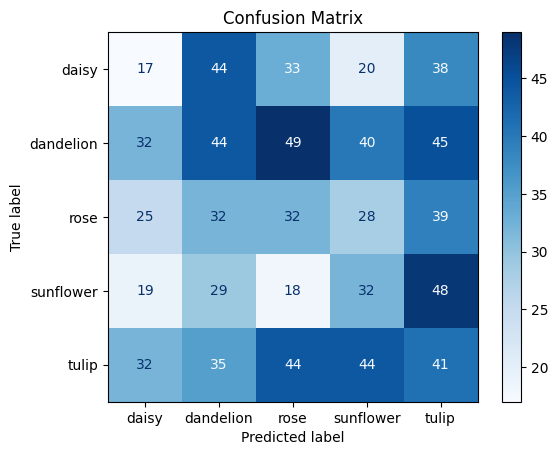

In [12]:
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Visualizing accuracy and loss over epochs

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

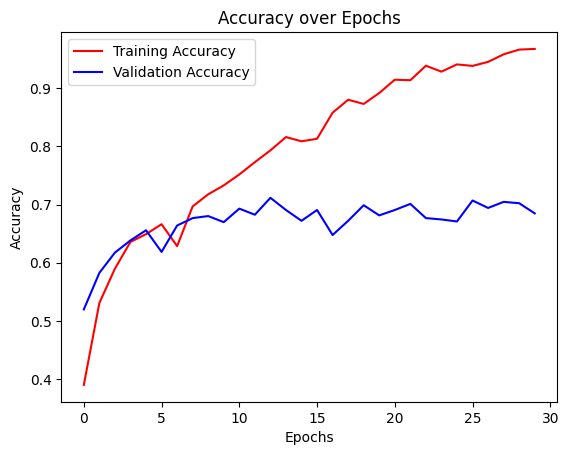

In [14]:
plt.plot(epochs_range, acc, label='Training Accuracy', color='red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='blue')
plt.legend(loc=0)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

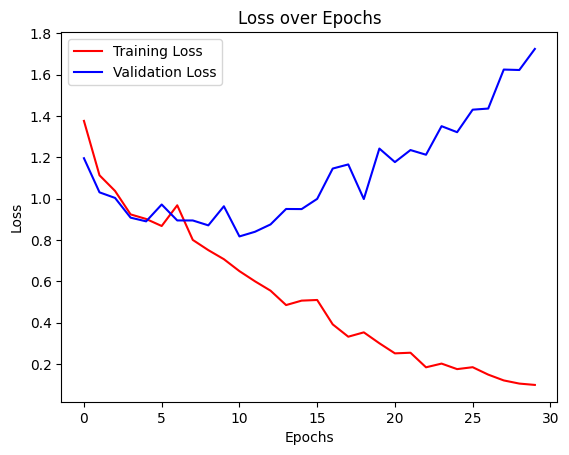

In [15]:
plt.plot(epochs_range, loss, label='Training Loss', color='red')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='blue')
plt.legend(loc=0)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### Model prediction

In [16]:
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

def predict_flower(image_path, model, class_names):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    confidence_score = np.max(predictions) * 100
    label = class_names[predicted_class_index]

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}\nConfidence: {confidence_score:.2f}%", fontsize=14, color='black')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step


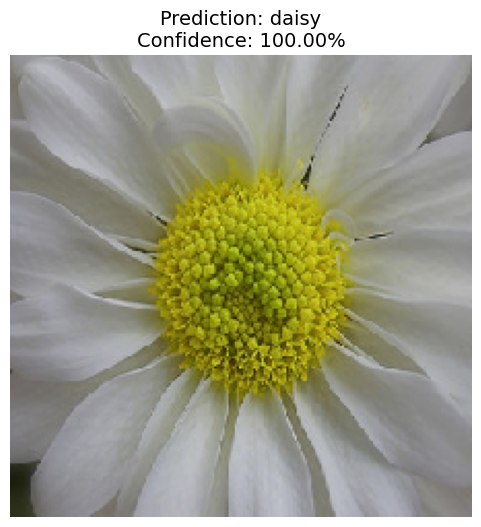

In [17]:
image_path = '/content/flowers/daisy/100080576_f52e8ee070_n.jpg'
predict_flower(image_path, model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


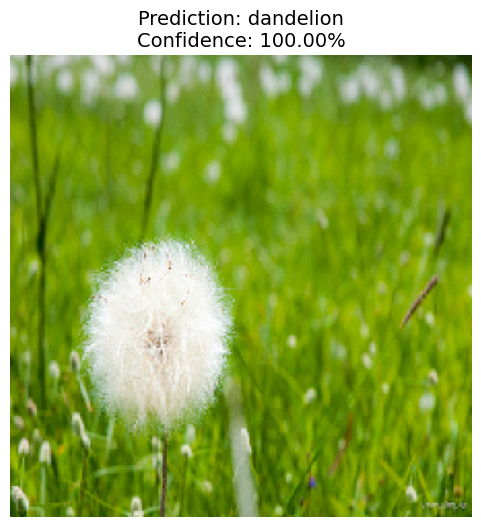

In [20]:
image_path = '/content/flowers/dandelion/10777398353_5a20bb218c.jpg'
predict_flower(image_path, model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


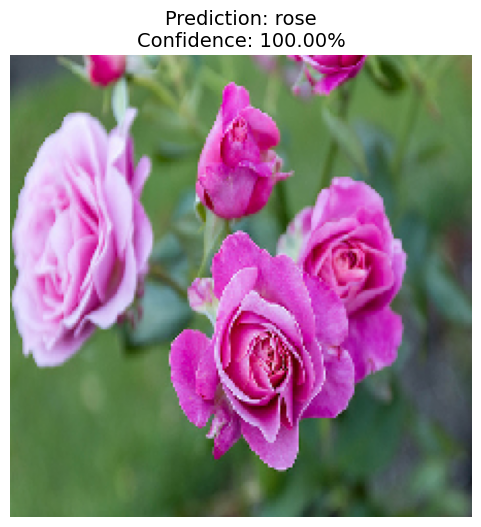

In [21]:
image_path = '/content/flowers/rose/11944957684_2cc806276e.jpg'
predict_flower(image_path, model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


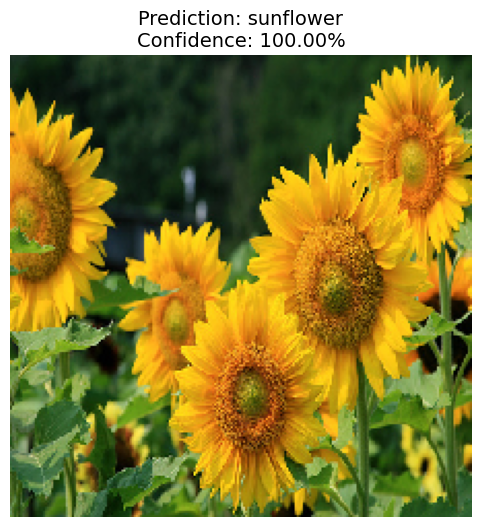

In [22]:
image_path = '/content/flowers/sunflower/1008566138_6927679c8a.jpg'
predict_flower(image_path, model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


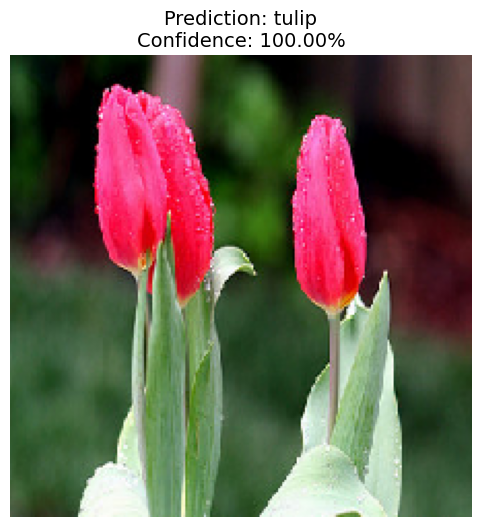

In [23]:
image_path = '/content/flowers/tulip/100930342_92e8746431_n.jpg'
predict_flower(image_path, model, class_names)